In [1]:
!pip install pandas

In [2]:
!pip install seaborn
!pip install configparser
!pip install matplotlib

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from configparser import ConfigParser


In [146]:
SIZE_MODEL = 444584
METHODS = ["default_1", 'default', 'r_robin']
# ic_params = [0.1, 0.2, 0.3, 0.4, 0.5]
ic_params = [0.1, 0.2, 0.3, 0.4, 0.5]
# expl_params = [0.25, 0.50, 0.75]
expl_params = [0.25, 0.50, 0.75]


In [147]:
# Lendo o arquivo de configuração
def read_config(filename, section):
    config = ConfigParser()
    config.read(filename)
    if section in config:
        return config[section]
    else:
        raise ValueError(f"Section '{section}' not found in the configuration file.")

def filter_dataframe(df, config, solution):
    # Construindo a expressão de filtro com base na configuração
    filter_expressions = []
    for key, value in config.items():
        if key in df.columns:
            column_type = df[key].dtype
            if column_type == 'bool':
                typed_value = str(value.lower() in ['true', 'yes', '1'])
            elif column_type in ['int64', 'float']:
                typed_value = value
            else:
                typed_value = f"'{value}'"  # Adiciona aspas para garantir que seja tratado como string

            filter_expressions.append(f"(client_data['{key}'] == {typed_value})")

    # Juntando as expressões de filtro com operador lógico AND
    filter_expressions.append(f"(client_data['solution'] == '{solution}'.upper())")
    filter_expression = " & ".join(filter_expressions)
    print(filter_expression)
    filtered_df = df.loc[eval(filter_expression)]
    return filtered_df


In [148]:
client_data = pd.read_csv('logs/c-data.csv')

In [149]:
client_data.loc[client_data['exploration'] == 0.75]

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients,config_test
215000,1,1,cia,default_1,dnn,0.260,21.706049,0.285,28.674536,0.803306,...,0.1,True,mnist,0.0,0.75,0.0,0.005,1.0,0.1,FedCIA random ic:10 expl:75
215001,1,20,cia,default_1,dnn,0.265,38.258774,0.145,49.941383,0.120000,...,0.1,True,mnist,0.0,0.75,0.0,0.005,1.0,0.1,FedCIA random ic:10 expl:75
215002,1,44,cia,default_1,dnn,0.170,92.345421,0.160,147.784271,0.898950,...,0.1,True,mnist,0.0,0.75,0.0,0.005,1.0,0.1,FedCIA random ic:10 expl:75
215003,1,32,cia,default_1,dnn,0.295,32.878342,0.265,42.318024,0.616715,...,0.1,True,mnist,0.0,0.75,0.0,0.005,1.0,0.1,FedCIA random ic:10 expl:75
215004,1,8,cia,default_1,dnn,0.295,55.403854,0.310,43.644684,0.822066,...,0.1,True,mnist,0.0,0.75,0.0,0.005,1.0,0.1,FedCIA random ic:10 expl:75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267495,50,1,cia,r_robin,dnn,0.795,1.007000,0.440,51.863720,0.966391,...,0.1,True,mnist,0.0,0.75,0.0,0.005,1.0,0.5,FedCIA R_ROBIN ic:50 expl:75
267496,50,8,cia,r_robin,dnn,0.880,0.467807,0.355,44.061123,0.964286,...,0.1,True,mnist,0.0,0.75,0.0,0.005,1.0,0.5,FedCIA R_ROBIN ic:50 expl:75
267497,50,45,cia,r_robin,dnn,0.885,0.464369,0.175,81.339653,0.969108,...,0.1,True,mnist,0.0,0.75,0.0,0.005,1.0,0.5,FedCIA R_ROBIN ic:50 expl:75
267498,50,44,cia,r_robin,dnn,0.840,0.586443,0.170,85.194000,0.984993,...,0.1,True,mnist,0.0,0.75,0.0,0.005,1.0,0.5,FedCIA R_ROBIN ic:50 expl:75


In [150]:
server_data = pd.read_csv('logs/s-data.csv')
server_data['selection'] = server_data['selection'].apply(
    lambda x: [
        (cid, desired)
        for cid, desired in 
        [b.split(':') for b in x.split('|')]
    ]
)
server_data.loc[server_data['init_clients'] == 0.1].head()



,rounds,strategy,model_type,select_client_method,n_selected,n_engaged,n_not_engaged,selection,r_intetion,r_robin,...,local_epochs,dirichlet_alpha,non_iid,dataset,exploitation,exploration,decay,threshold,init_clients,config_test
0,1,poc,dnn,NaN,50,5,45,"[(0, False), (1, False), (2, False), (3, False...",NaN,NaN,...,1,0.1,True,mnist,NaN,0.1,NaN,1.0,0.1,POC 10 ic:10
1,2,poc,dnn,NaN,5,5,45,"[(20, False), (47, False), (35, False), (10, F...",NaN,NaN,...,1,0.1,True,mnist,NaN,0.1,NaN,1.0,0.1,POC 10 ic:10
2,3,poc,dnn,NaN,5,8,42,"[(20, True), (49, True), (10, False), (35, Fal...",NaN,NaN,...,1,0.1,True,mnist,NaN,0.1,NaN,1.0,0.1,POC 10 ic:10
3,4,poc,dnn,NaN,5,9,41,"[(20, True), (49, True), (43, True), (10, Fals...",NaN,NaN,...,1,0.1,True,mnist,NaN,0.1,NaN,1.0,0.1,POC 10 ic:10
4,5,poc,dnn,NaN,5,10,40,"[(43, True), (10, False), (49, True), (20, Tru...",NaN,NaN,...,1,0.1,True,mnist,NaN,0.1,NaN,1.0,0.1,POC 10 ic:10


In [151]:
literature_solutions = [
    'POC 10 ic:10',
    'POC 20 ic:10',
    'POC 30 ic:10',
    'AVG 10 ic:10',
    'AVG 20 ic:10',
    'AVG 30 ic:10',
    'DEEV 0.01 ic:10',
    'DEEV 0.005 ic:10',
    'DEEV 0.001 ic:10',
    'POC 10 ic:20',
    'POC 20 ic:20',
    'POC 30 ic:20',
    'AVG 10 ic:20',
    'AVG 20 ic:20',
    'AVG 30 ic:20',
    'DEEV 0.01 ic:20',
    'DEEV 0.005 ic:20',
    'DEEV 0.001 ic:20',
    'POC 10 ic:30',
    'POC 20 ic:30',
    'POC 30 ic:30',
    'AVG 10 ic:30',
    'AVG 20 ic:30',
    'AVG 30 ic:30',
    'DEEV 0.01 ic:30',
    'DEEV 0.005 ic:30',
    'DEEV 0.001 ic:30',
    'POC 10 ic:40',
    'POC 20 ic:40',
    'POC 30 ic:40',
    'AVG 10 ic:40',
    'AVG 20 ic:40',
    'AVG 30 ic:40',
    'DEEV 0.01 ic:40',
    'DEEV 0.005 ic:40',
    'DEEV 0.001 ic:40',
    'POC 10 ic:50',
    'POC 20 ic:50',
    'POC 30 ic:50',
    'AVG 10 ic:50',
    'AVG 20 ic:50',
    'AVG 30 ic:50',
    'DEEV 0.01 ic:50',
    'DEEV 0.005 ic:50',
    'DEEV 0.001 ic:50',
]

In [152]:
# Definir cores para cada solução
cores_solucao = {
    'AVG': '#1f77b4',  # Azul
    'POC': '#ff7f0e',  # Laranja
    'DEEV': '#2ca02c', # Verde
    'FedCIA': '#d62728' # Vermelho
}

# Definir marcadores para cada variação
marcadores_variacao = {
    'ic:10': 'o',
    'ic:20': 's',
    'ic:30': 'D',
    'ic:40': '^',
    'ic:50': 'v',
    'expl:25': 'o',
    'expl:50': 's',
    'expl:75': 'D'
}

# Lista de identificadores
labels = [
    'POC 10 ic:10', 'POC 20 ic:10', 'POC 30 ic:10',
    'AVG 10 ic:10', 'AVG 20 ic:10', 'AVG 30 ic:10',
    'DEEV 0.01 ic:10', 'DEEV 0.005 ic:10', 'DEEV 0.001 ic:10',
    'FedCIA random ic:10 expl:25', 'FedCIA DEEV ic:10 expl:25', 'FedCIA R_ROBIN ic:10 expl:25',
    'FedCIA random ic:10 expl:50', 'FedCIA DEEV ic:10 expl:50', 'FedCIA R_ROBIN ic:10 expl:50',
    'FedCIA random ic:10 expl:75', 'FedCIA DEEV ic:10 expl:75', 'FedCIA R_ROBIN ic:10 expl:75',
    'POC 10 ic:20', 'POC 20 ic:20', 'POC 30 ic:20',
    'AVG 10 ic:20', 'AVG 20 ic:20', 'AVG 30 ic:20',
    'DEEV 0.01 ic:20', 'DEEV 0.005 ic:20', 'DEEV 0.001 ic:20',
    'FedCIA random ic:20 expl:25', 'FedCIA DEEV ic:20 expl:25', 'FedCIA R_ROBIN ic:20 expl:25',
    'FedCIA random ic:20 expl:50', 'FedCIA DEEV ic:20 expl:50', 'FedCIA R_ROBIN ic:20 expl:50',
    'FedCIA random ic:20 expl:75', 'FedCIA DEEV ic:20 expl:75', 'FedCIA R_ROBIN ic:20 expl:75',
    'POC 10 ic:30', 'POC 20 ic:30', 'POC 30 ic:30',
    'AVG 10 ic:30', 'AVG 20 ic:30', 'AVG 30 ic:30',
    'DEEV 0.01 ic:30', 'DEEV 0.005 ic:30', 'DEEV 0.001 ic:30',
    'FedCIA random ic:30 expl:25', 'FedCIA DEEV ic:30 expl:25', 'FedCIA R_ROBIN ic:30 expl:25',
    'FedCIA random ic:30 expl:50', 'FedCIA DEEV ic:30 expl:50', 'FedCIA R_ROBIN ic:30 expl:50',
    'FedCIA random ic:30 expl:75', 'FedCIA DEEV ic:30 expl:75', 'FedCIA R_ROBIN ic:30 expl:75',
    'POC 10 ic:40', 'POC 20 ic:40', 'POC 30 ic:40',
    'AVG 10 ic:40', 'AVG 20 ic:40', 'AVG 30 ic:40',
    'DEEV 0.01 ic:40', 'DEEV 0.005 ic:40', 'DEEV 0.001 ic:40',
    'FedCIA random ic:40 expl:25', 'FedCIA DEEV ic:40 expl:25', 'FedCIA R_ROBIN ic:40 expl:25',
    'FedCIA random ic:40 expl:50', 'FedCIA DEEV ic:40 expl:50', 'FedCIA R_ROBIN ic:40 expl:50',
    'FedCIA random ic:40 expl:75', 'FedCIA DEEV ic:40 expl:75', 'FedCIA R_ROBIN ic:40 expl:75',
    'POC 10 ic:50', 'POC 20 ic:50', 'POC 30 ic:50',
    'AVG 10 ic:50', 'AVG 20 ic:50', 'AVG 30 ic:50',
    'DEEV 0.01 ic:50', 'DEEV 0.005 ic:50', 'DEEV 0.001 ic:50',
    'FedCIA random ic:50 expl:25', 'FedCIA DEEV ic:50 expl:25', 'FedCIA R_ROBIN ic:50 expl:25',
    'FedCIA random ic:50 expl:50', 'FedCIA DEEV ic:50 expl:50', 'FedCIA R_ROBIN ic:50 expl:50',
    'FedCIA random ic:50 expl:75', 'FedCIA DEEV ic:50 expl:75', 'FedCIA R_ROBIN ic:50 expl:75'
]

# Função para extrair a solução e a variação do identificador
def extrair_solucao_variacao(label):
    partes = label.split()
    solucao = partes[0]
    variacao = 'ic:' + partes[-1].split(':')[-1] if 'expl' not in label else 'expl:' + partes[-1].split(':')[-1]
    return solucao, variacao

# Criar um DataFrame para plotar os dados
data = pd.DataFrame({
    'Label': labels,
    'Solução': [extrair_solucao_variacao(label)[0] for label in labels],
    'Variação': [extrair_solucao_variacao(label)[1] for label in labels]
})

# Criar uma paleta de cores e um dicionário de marcadores
palette = {label: cores_solucao[extrair_solucao_variacao(label)[0]] for label in labels}
markers = {label: marcadores_variacao[extrair_solucao_variacao(label)[1]] for label in labels}



In [153]:
data_literature = client_data.loc[client_data['config_test'].isin(literature_solutions)].copy()
data = client_data.drop(client_data.loc[client_data['config_test'].isin(literature_solutions)].index, axis=0)


In [154]:
data['config_test'].unique()

array(['FedCIA random ic:10 expl:25', 'FedCIA DEEV ic:10 expl:25',
       'FedCIA R_ROBIN ic:10 expl:25', 'FedCIA random ic:10 expl:50',
       'FedCIA DEEV ic:10 expl:50', 'FedCIA R_ROBIN ic:10 expl:50',
       'FedCIA random ic:20 expl:25', 'FedCIA DEEV ic:20 expl:25',
       'FedCIA R_ROBIN ic:20 expl:25', 'FedCIA random ic:20 expl:50',
       'FedCIA DEEV ic:20 expl:50', 'FedCIA R_ROBIN ic:20 expl:50',
       'FedCIA DEEV ic:20 expl:75', 'FedCIA R_ROBIN ic:20 expl:75',
       'FedCIA random ic:30 expl:25', 'FedCIA DEEV ic:30 expl:25',
       'FedCIA R_ROBIN ic:30 expl:25', 'FedCIA random ic:30 expl:50',
       'FedCIA DEEV ic:30 expl:50', 'FedCIA R_ROBIN ic:30 expl:50',
       'FedCIA random ic:30 expl:75', 'FedCIA DEEV ic:30 expl:75',
       'FedCIA R_ROBIN ic:30 expl:75', 'FedCIA random ic:40 expl:25',
       'FedCIA DEEV ic:40 expl:25', 'FedCIA R_ROBIN ic:40 expl:25',
       'FedCIA random ic:40 expl:50', 'FedCIA DEEV ic:40 expl:50',
       'FedCIA R_ROBIN ic:40 expl:50', 'FedCI

In [155]:
data_literature['config_test'].unique()

array(['POC 10 ic:10', 'POC 20 ic:10', 'POC 30 ic:10', 'AVG 10 ic:10',
       'AVG 20 ic:10', 'AVG 30 ic:10', 'DEEV 0.01 ic:10',
       'DEEV 0.005 ic:10', 'DEEV 0.001 ic:10', 'POC 10 ic:20',
       'POC 20 ic:20', 'POC 30 ic:20', 'AVG 10 ic:20', 'AVG 20 ic:20',
       'AVG 30 ic:20', 'DEEV 0.01 ic:20', 'DEEV 0.005 ic:20',
       'DEEV 0.001 ic:20', 'POC 10 ic:30', 'POC 20 ic:30', 'POC 30 ic:30',
       'AVG 10 ic:30', 'AVG 20 ic:30', 'AVG 30 ic:30', 'DEEV 0.01 ic:30',
       'DEEV 0.005 ic:30', 'DEEV 0.001 ic:30', 'POC 10 ic:40',
       'POC 20 ic:40', 'POC 30 ic:40', 'AVG 10 ic:40', 'AVG 20 ic:40',
       'AVG 30 ic:40', 'DEEV 0.01 ic:40', 'DEEV 0.005 ic:40',
       'DEEV 0.001 ic:40', 'POC 10 ic:50', 'POC 20 ic:50', 'POC 30 ic:50',
       'AVG 10 ic:50', 'AVG 20 ic:50', 'AVG 30 ic:50', 'DEEV 0.01 ic:50',
       'DEEV 0.005 ic:50', 'DEEV 0.001 ic:50'], dtype=object)

In [156]:
def plot_acc():
    r_plots = len(expl_params)
    c_plots = len(ic_params)
    
    
    for i, expl in enumerate(expl_params):
        fig, axes = plt.subplots(1, c_plots, figsize=(17,3), sharey=True)
        fig.subplots_adjust(hspace=0, wspace=0)
        for j, ic in enumerate(ic_params):
            df_cia = data.loc[
                (data['init_clients'] == ic) &
                (data['exploration'] == expl) &
                # (data['exploration'] == expl) &
                (data['select_client_method'].isin(METHODS))
            ]
            df_l = data_literature.loc[
                (data_literature['init_clients'] == 0.1)
            ]
            sns.lineplot(
                ax=axes[j],
                # marker=markers[ic],
                # color=color[]
                data=pd.concat([df_cia, df_l]),
                hue='config_test',
                y='g_eval_acc',
                x='rounds',
                errorbar=('ci', False),
                palette=palette, markers=markers,
            )
            legend = axes[j].get_legend()
            if legend:
                axes[j].get_legend().remove()
        handles, legend = axes[0].get_legend_handles_labels()
        fig.legend(handles, legend, bbox_to_anchor=(0,0,1,1.1), ncol=9)

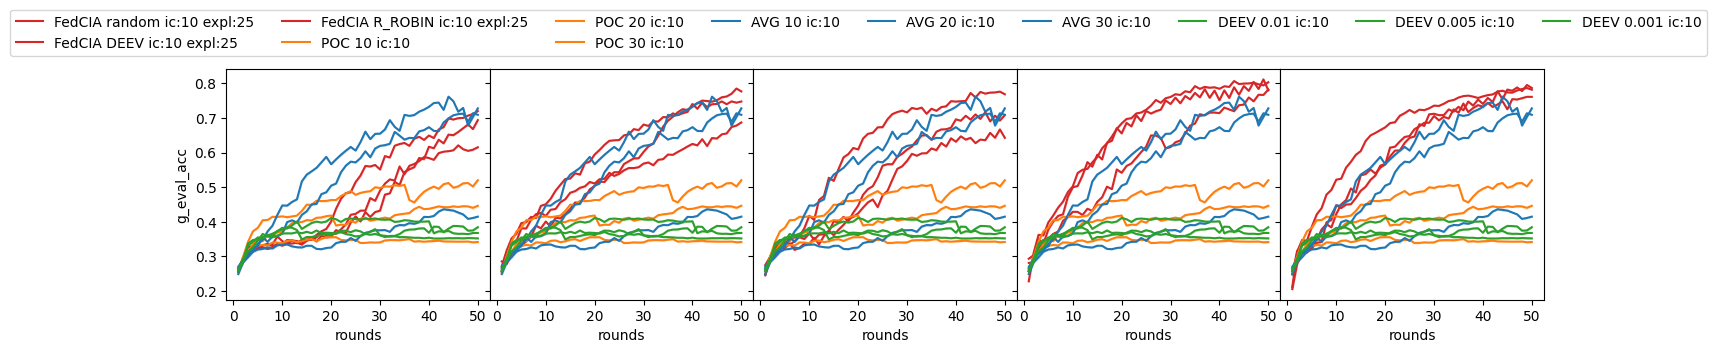

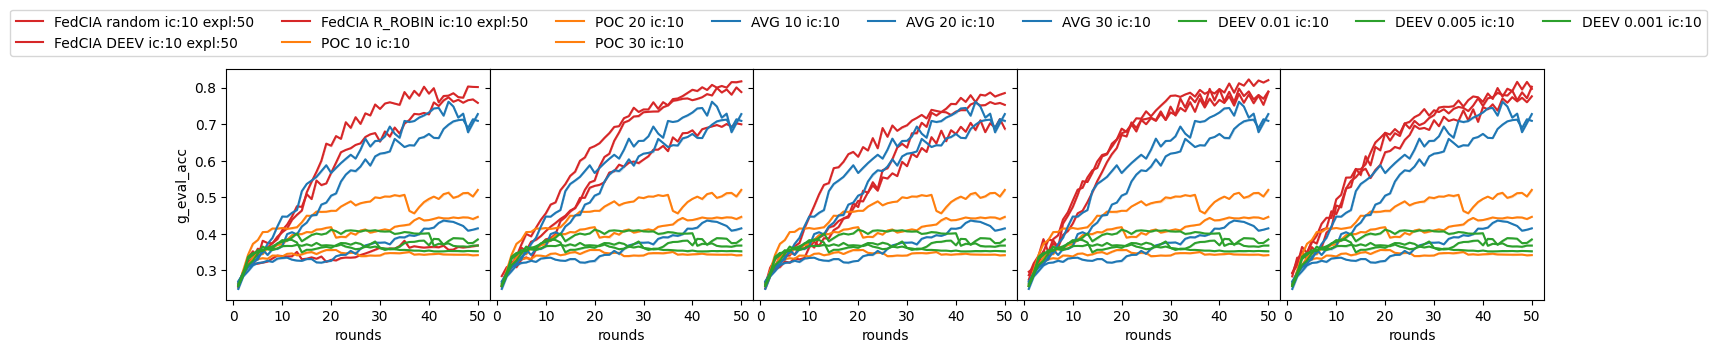

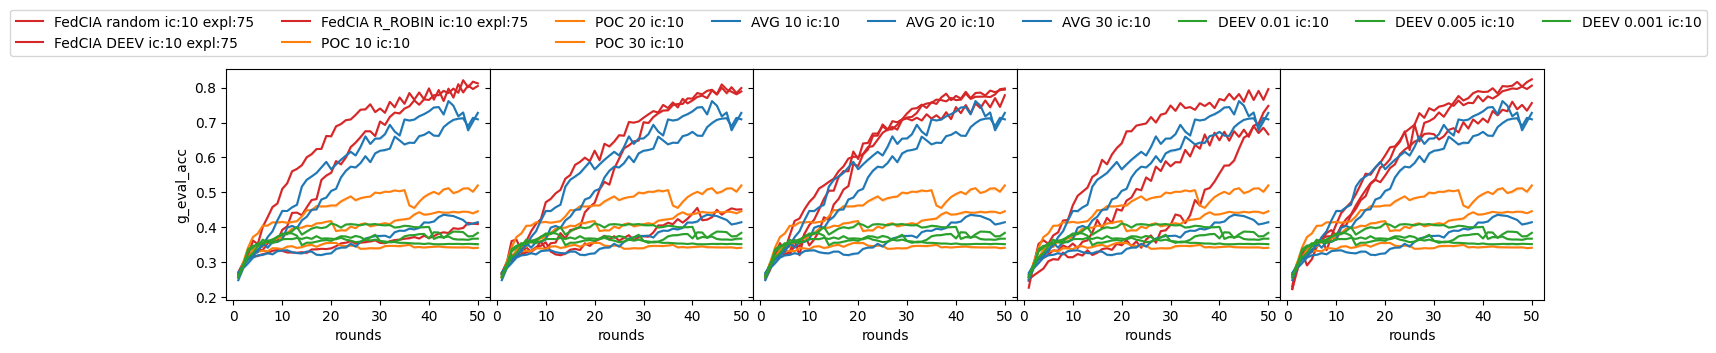

In [157]:
plot_acc()

## LINE PLOT

## ONLY CIA

In [140]:
# select_but_not_engaged = data[(data['is_selected'] == True)]
select_but_not_engaged = data[
    (data['rounds'] > 1) &
    (data['is_selected'] == True) 
    # (data['old_dynamic_engagement'] == False)
]
# select_but_not_engaged = data[(data['is_selected'] == True) & (data['select_client_method'] == METHOD)]
# select_but_not_engaged = select_but_not_engaged.loc[]
g_select_but_not_engaged = select_but_not_engaged.groupby(['init_clients', 'exploration', 'config_test']).agg({'is_selected': 'count'}).reset_index()
# g_select_but_not_engaged['is_selected'] = (g_select_but_not_engaged['is_selected'] * SIZE_MODEL)/1048576
g_select_but_not_engaged

,init_clients,exploration,config_test,is_selected
0,0.10,0.25,FedCIA DEEV ic:10 expl:25,584
1,0.10,0.25,FedCIA R_ROBIN ic:10 expl:25,677
2,0.10,0.25,FedCIA random ic:10 expl:25,674
3,0.10,0.50,FedCIA DEEV ic:10 expl:50,465
4,0.10,0.50,FedCIA R_ROBIN ic:10 expl:50,868
5,0.10,0.50,FedCIA random ic:10 expl:50,856
6,0.20,0.25,FedCIA DEEV ic:20 expl:25,784
7,0.20,0.25,FedCIA R_ROBIN ic:20 expl:25,753
8,0.20,0.25,FedCIA random ic:20 expl:25,751
9,0.20,0.50,FedCIA DEEV ic:20 expl:50,788


In [158]:
select_but_not_engaged_literature = data_literature[
    (data_literature['rounds'] > 1) &
    (data_literature['is_selected'] == True) &
    (data_literature['old_dynamic_engagement'] == False)
]
# select_but_not_engaged_literature = data_literature[(data_literature['is_selected'] == True) & (data_literature['old_dynamic_engagement'] == False)]
g_select_but_not_engaged_literature = select_but_not_engaged_literature.groupby(['init_clients', 'exploration', 'config_test']).agg({'is_selected': 'count'}).reset_index()
# g_select_but_not_engaged_literature['is_selected'] = (g_select_but_not_engaged_literature['is_selected'] * SIZE_MODEL)/1048576
g_select_but_not_engaged_literature

,init_clients,exploration,config_test,is_selected
0,0.1,0.1,AVG 10 ic:10,110
1,0.1,0.1,POC 10 ic:10,140
2,0.1,0.2,AVG 20 ic:10,137
3,0.1,0.2,POC 20 ic:10,155
4,0.1,0.3,AVG 30 ic:10,204
5,0.1,0.3,DEEV 0.001 ic:10,121
6,0.1,0.3,DEEV 0.005 ic:10,119
7,0.1,0.3,DEEV 0.01 ic:10,99
8,0.1,0.3,POC 30 ic:10,233
9,0.2,0.1,AVG 10 ic:20,28


In [167]:

def plot_bw(df_list, ax, ic, literature):
    sns.barplot(ax=ax[0], estimator='sum',y='is_selected', data=pd.concat([literature.loc[literature['init_clients'] == 0.10],df_list[0]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    sns.barplot(ax=ax[1], estimator='sum',y='is_selected', data=pd.concat([literature.loc[literature['init_clients'] == 0.],df_list[1]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    # sns.barplot(ax=ax[2], estimator='sum',y='is_selected', data=pd.concat([literature.loc[literature['init_clients'] == ic],df_list[2]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    # sns.barplot(ax=ax[3], estimator='sum',y='is_selected', data=pd.concat([literature.loc[literature['init_clients'] == ic],df_list[3]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    ax[0].get_legend().remove()
    # ax[0].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.4))
    # ax[1].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.4))
    # ax[2].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.4))
    # ax[3].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.4))



In [168]:
data_0_25 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.1]
# df_0_25_0_0 = data_0_25.loc[data_0_25['exploration'] == 0.01]
# df_0_25_0_0
# df_0_25_0_33 = data_0_25.loc[data_0_25['exploration'] == 0.33]
# df_0_25_0_66 = data_0_25.loc[data_0_25['exploration'] == 0.66]
# df_0_25_1_00 = data_0_25.loc[data_0_25['exploration'] == 1.00]
data_0_25

,init_clients,exploration,config_test,is_selected
0,0.1,0.25,FedCIA DEEV ic:10 expl:25,584
1,0.1,0.25,FedCIA R_ROBIN ic:10 expl:25,677
2,0.1,0.25,FedCIA random ic:10 expl:25,674
3,0.1,0.50,FedCIA DEEV ic:10 expl:50,465
4,0.1,0.50,FedCIA R_ROBIN ic:10 expl:50,868
5,0.1,0.50,FedCIA random ic:10 expl:50,856


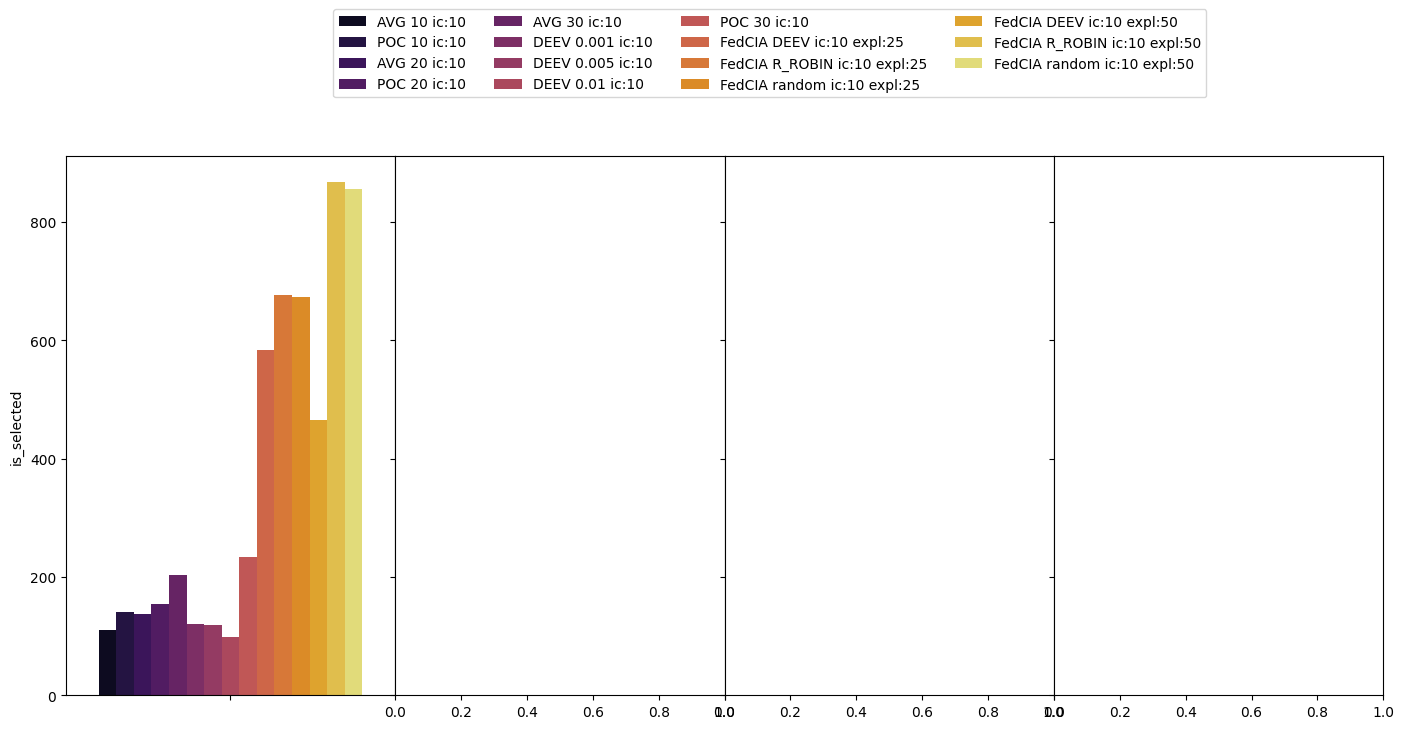

In [174]:
fig_0_25, ax_0_25 = plt.subplots(1,4, figsize=(17,7), sharey=True)
# plot_bw([df_0_25_0_0, df_0_25_0_33, df_0_25_0_66, df_0_25_1_00], ax_0_25, 0.25, g_select_but_not_engaged_literature)
plot_bw([data_0_25], ax_0_25, 0.1, g_select_but_not_engaged_literature)
fig_0_25.savefig('0.25.png', format='png', dpi=300)
fig_0_25.subplots_adjust(hspace=0, wspace=0)
handles, legend = ax_0_25[0].get_legend_handles_labels()
fig_0_25.legend(handles, legend, bbox_to_anchor=(0,0,0.8,1.1), ncol=4)
fig_0_25.show()


In [131]:
data_0_50 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.50]
df_0_50_0_0 = data_0_50.loc[data_0_50['exploration'] == 0.00]
df_0_50_0_33 = data_0_50.loc[data_0_50['exploration'] == 0.33]
df_0_50_0_66 = data_0_50.loc[data_0_50['exploration'] == 0.66]
df_0_50_1_00 = data_0_50.loc[data_0_50['exploration'] == 1.00]

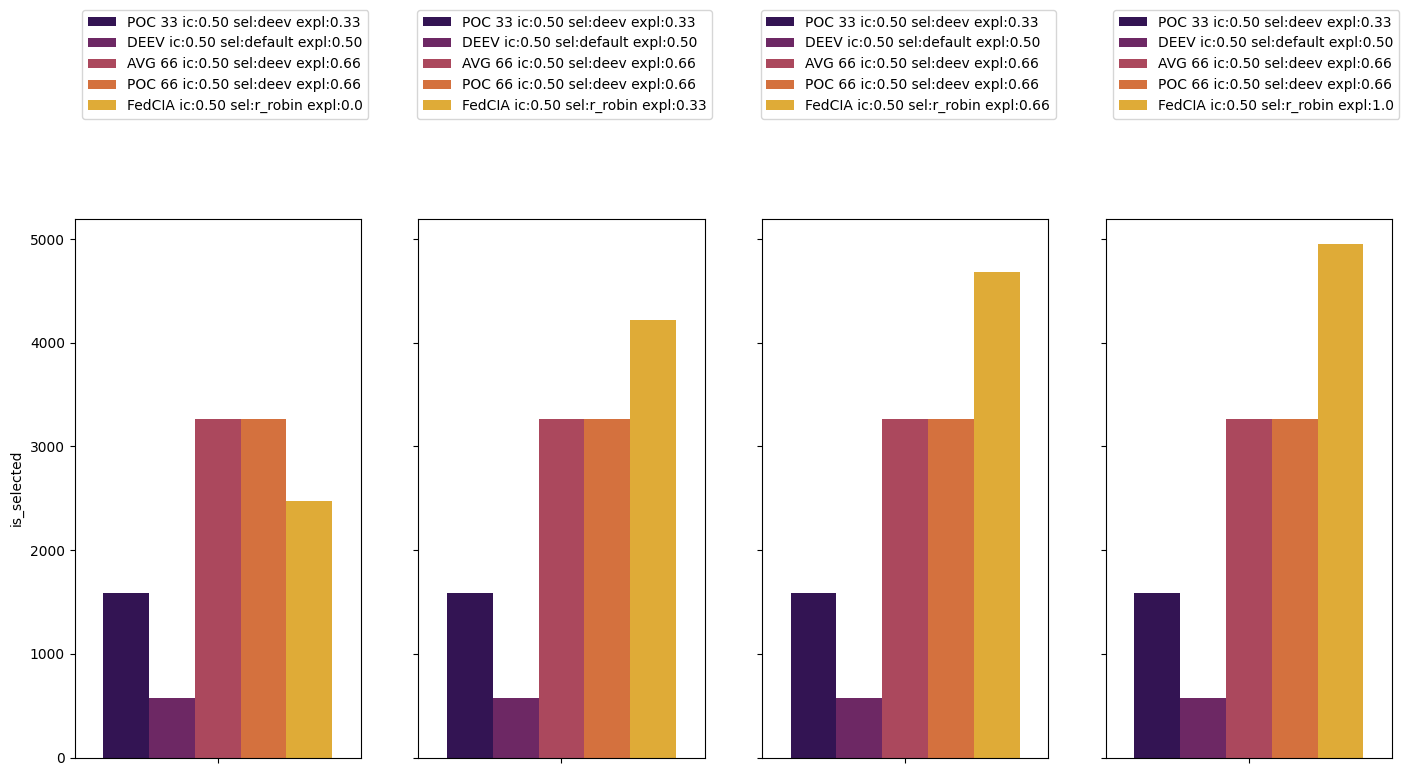

In [132]:
fig_0_50, ax_0_50 = plt.subplots(1,4, figsize=(17,7), sharey=True)
plot_bw([df_0_50_0_0, df_0_50_0_33, df_0_50_0_66, df_0_50_1_00], ax_0_50, 0.50, g_select_but_not_engaged_literature)
fig_0_50.savefig('0.50.png', format='png', dpi=300)
fig_0_50.subplots_adjust(hspace=0)
fig_0_50.show()
#FedCIA ic:0.50 sel:deev expl:0.33
#POC 50 ic:0.50 sel:deev expl:0.50

In [133]:
data_0_75 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.75]
df_0_75_0_0 = data_0_75.loc[data_0_75['exploration'] == 0.00]
df_0_75_0_33 = data_0_75.loc[data_0_75['exploration'] == 0.33]
df_0_75_0_66 = data_0_75.loc[data_0_75['exploration'] == 0.66]
df_0_75_1_00 = data_0_75.loc[data_0_75['exploration'] == 1.00]

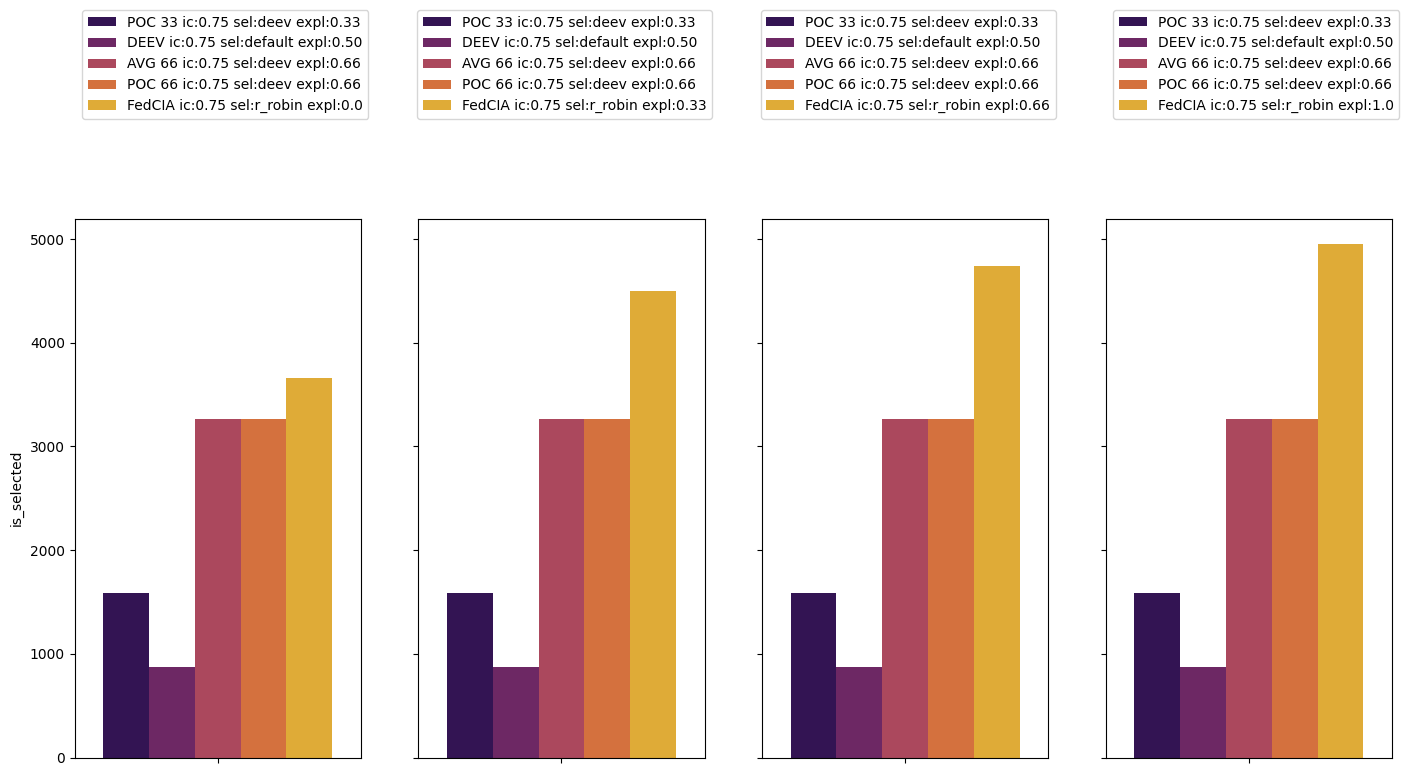

In [134]:
fig_0_75, ax_0_75 = plt.subplots(1,4, figsize=(17,7), sharey=True)
plot_bw([df_0_75_0_0, df_0_75_0_33, df_0_75_0_66, df_0_75_1_00], ax_0_75, 0.75, g_select_but_not_engaged_literature)
fig_0_75.savefig('0.75.png', format='png', dpi=300)
fig_0_75.subplots_adjust(hspace=0)
fig_0_75.show()
#FedCIA ic: 75 sel:deev expl:0.33

## ONLY SOLUTION

In [135]:
# Interested Clients 0.25
data_0_25 = data.loc[(data['init_clients'] == 0.25) & (data['strategy'] == 'cia')]
df_0_25_0_0 = data_0_25.loc[data_0_25['exploration'] == 0.00]
df_0_25_0_33 = data_0_25.loc[data_0_25['exploration'] == 0.33]
df_0_25_0_66 = data_0_25.loc[data_0_25['exploration'] == 0.66]
df_0_25_1_00 = data_0_25.loc[data_0_25['exploration'] == 1.00]

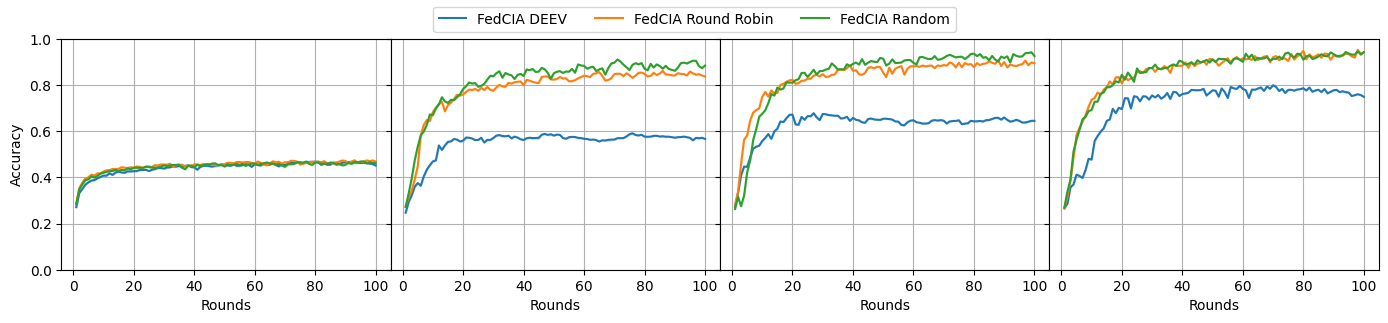

In [136]:
fig_0_25, ax_0_25 = plt.subplots(1,4, figsize=(17,3), sharey=True)
plot_only_cia([df_0_25_0_0, df_0_25_0_33, df_0_25_0_66, df_0_25_1_00], ax_0_25)
fig_0_25.savefig('0.25.png', format='png', dpi=300)
fig_0_25.subplots_adjust(hspace=0, wspace=0)
handles, labels = ax_0_25[0].get_legend_handles_labels()
fig_0_25.legend(handles, labels, loc='upper center', ncol=6)
# fig_0_25.tight_layout()
fig_0_25.show()

In [137]:
# Interested clients 0.5
data_0_50 = data.loc[data['init_clients'] == 0.50]
df_0_50_0_0 = data_0_50.loc[data_0_50['exploration'] == 0.00]
df_0_50_0_33 = data_0_50.loc[data_0_50['exploration'] == 0.33]
df_0_50_0_66 = data_0_50.loc[data_0_50['exploration'] == 0.66]
df_0_50_1_00 = data_0_50.loc[data_0_50['exploration'] == 1.00]


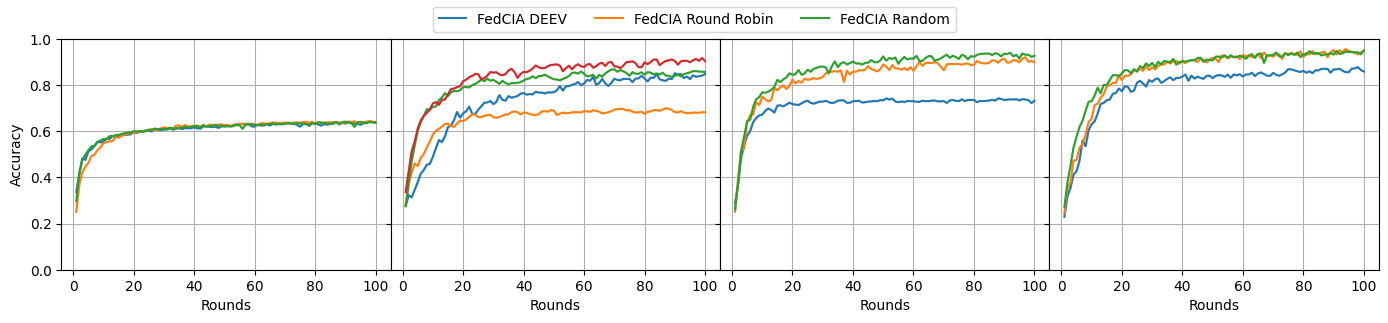

In [138]:
fig_0_50, ax_0_50 = plt.subplots(1,4, figsize=(17,3), sharey=True)
plot_only_cia([df_0_50_0_0, df_0_50_0_33, df_0_50_0_66, df_0_50_1_00], ax_0_50)
fig_0_50.savefig('0.50.png', format='png', dpi=300)
fig_0_50.subplots_adjust(hspace=0, wspace=0)
handles, labels = ax_0_50[0].get_legend_handles_labels()
fig_0_50.legend(handles, labels, loc='upper center', ncol=6)
# fig_0_50.tight_layout()
fig_0_50.show()

In [ ]:
# Interested clients 0.75
data_0_75 = data.loc[data['init_clients'] == 0.75]
df_0_75_0_0 = data_0_75.loc[data_0_75['exploration'] == 0.00]
df_0_75_0_33 = data_0_75.loc[data_0_75['exploration'] == 0.33]
df_0_75_0_66 = data_0_75.loc[data_0_75['exploration'] == 0.66]
df_0_75_1_00 = data_0_75.loc[data_0_75['exploration'] == 1.00]

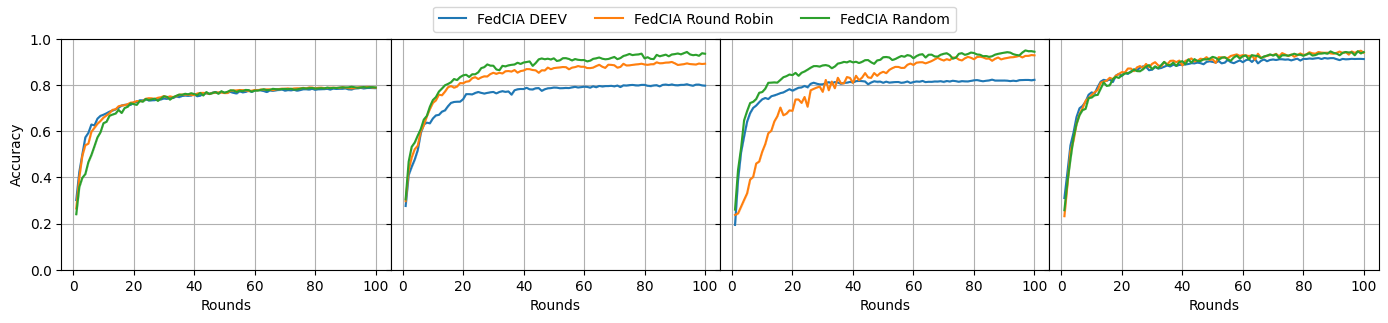

In [ ]:
fig_0_75, ax_0_75 = plt.subplots(1,4, figsize=(17,3), sharey=True)
plot_only_cia([df_0_75_0_0, df_0_75_0_33, df_0_75_0_66, df_0_75_1_00], ax_0_75)
fig_0_75.savefig('0.75.png', format='png', dpi=300)
fig_0_75.subplots_adjust(hspace=0, wspace = 0)
handles, labels = ax_0_75[0].get_legend_handles_labels()
fig_0_75.legend(handles, labels, loc='upper center', ncol = 6)
# fig_0_75.tight_layout()
fig_0_75.show()

In [ ]:
select_but_not_engaged = data[(data['old_dynamic_engagement'] == False) & (data['is_selected'] == True) & (data['strategy'] == 'cia')]
select_but_not_engaged = select_but_not_engaged.loc[select_but_not_engaged['rounds'] > 1]
g_select_but_not_engaged = select_but_not_engaged.groupby(['init_clients', 'exploration', 'config_test']).agg({'is_selected': 'count'}).reset_index()

In [ ]:
data_0_25 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.25]
df_0_25_0_0 = data_0_25.loc[data_0_25['exploration'] == 0.00]
df_0_25_0_33 = data_0_25.loc[data_0_25['exploration'] == 0.33]
df_0_25_0_66 = data_0_25.loc[data_0_25['exploration'] == 0.66]
df_0_25_1_00 = data_0_25.loc[data_0_25['exploration'] == 1.00]

/tmp/ipykernel_3445395/4177883523.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.15))


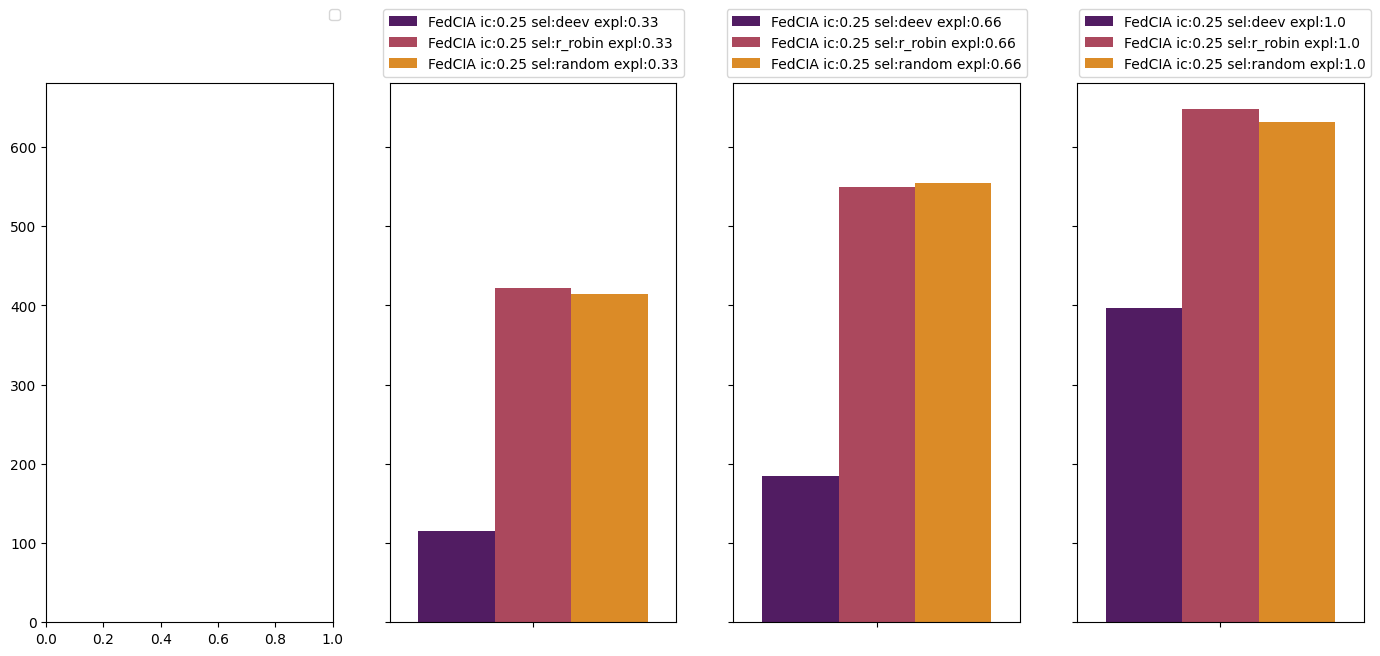

In [ ]:
fig_0_25, ax_0_25 = plt.subplots(1,4, figsize=(17,7), sharey=True)
plot_bw_only_cia([df_0_25_0_0, df_0_25_0_33, df_0_25_0_66, df_0_25_1_00], ax_0_25)
fig_0_25.savefig('0.25.png', format='png', dpi=300)
fig_0_25.subplots_adjust(hspace=0)
fig_0_25.show()

In [ ]:
data_0_50 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.50]
df_0_50_0_0 = data_0_50.loc[data_0_50['exploration'] == 0.00]
df_0_50_0_33 = data_0_50.loc[data_0_50['exploration'] == 0.33]
df_0_50_0_66 = data_0_50.loc[data_0_50['exploration'] == 0.66]
df_0_50_1_00 = data_0_50.loc[data_0_50['exploration'] == 1.00]

/tmp/ipykernel_3445395/4177883523.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.15))


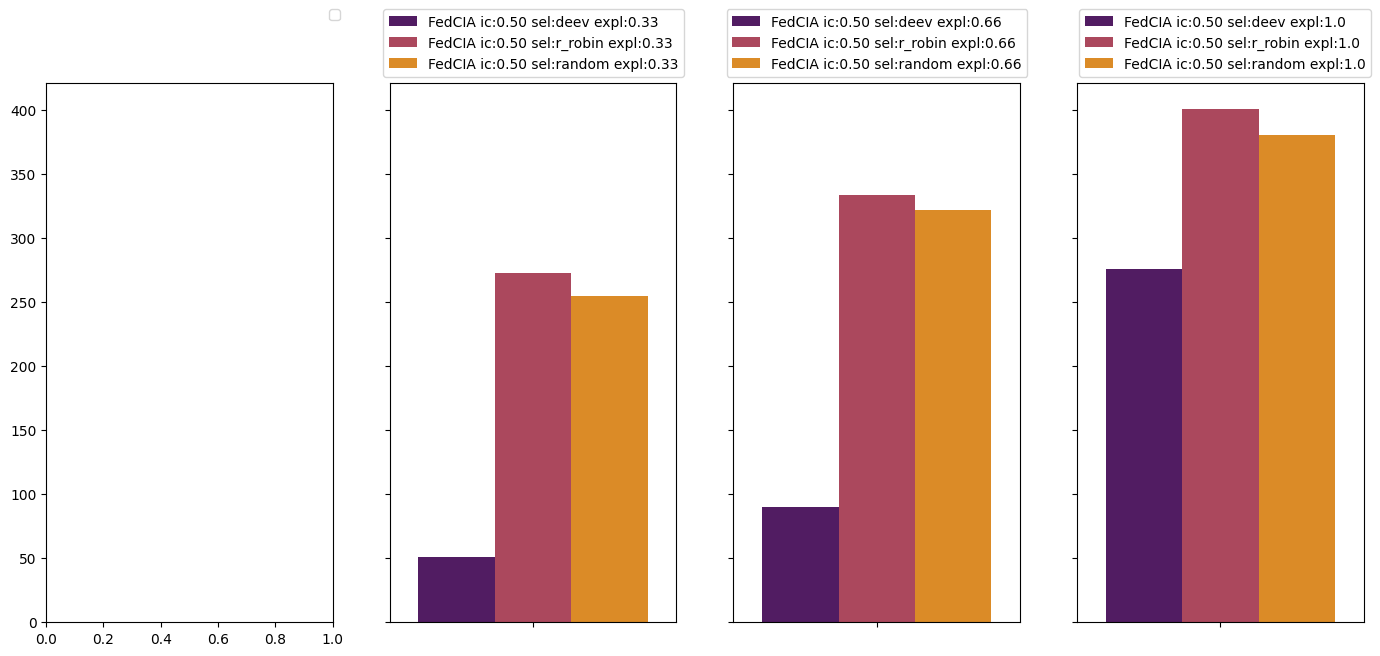

In [ ]:
fig_0_50, ax_0_50 = plt.subplots(1,4, figsize=(17,7), sharey=True)
plot_bw_only_cia([df_0_50_0_0, df_0_50_0_33, df_0_50_0_66, df_0_50_1_00], ax_0_50)
fig_0_50.savefig('0.50.png', format='png', dpi=300)
fig_0_50.subplots_adjust(hspace=0)
fig_0_50.show()

In [ ]:
data_0_75 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.75]
df_0_75_0_0 = data_0_75.loc[data_0_75['exploration'] == 0.00]
df_0_75_0_33 = data_0_75.loc[data_0_75['exploration'] == 0.33]
df_0_75_0_66 = data_0_75.loc[data_0_75['exploration'] == 0.66]
df_0_75_1_00 = data_0_75.loc[data_0_75['exploration'] == 1.00]

/tmp/ipykernel_3445395/4177883523.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.15))


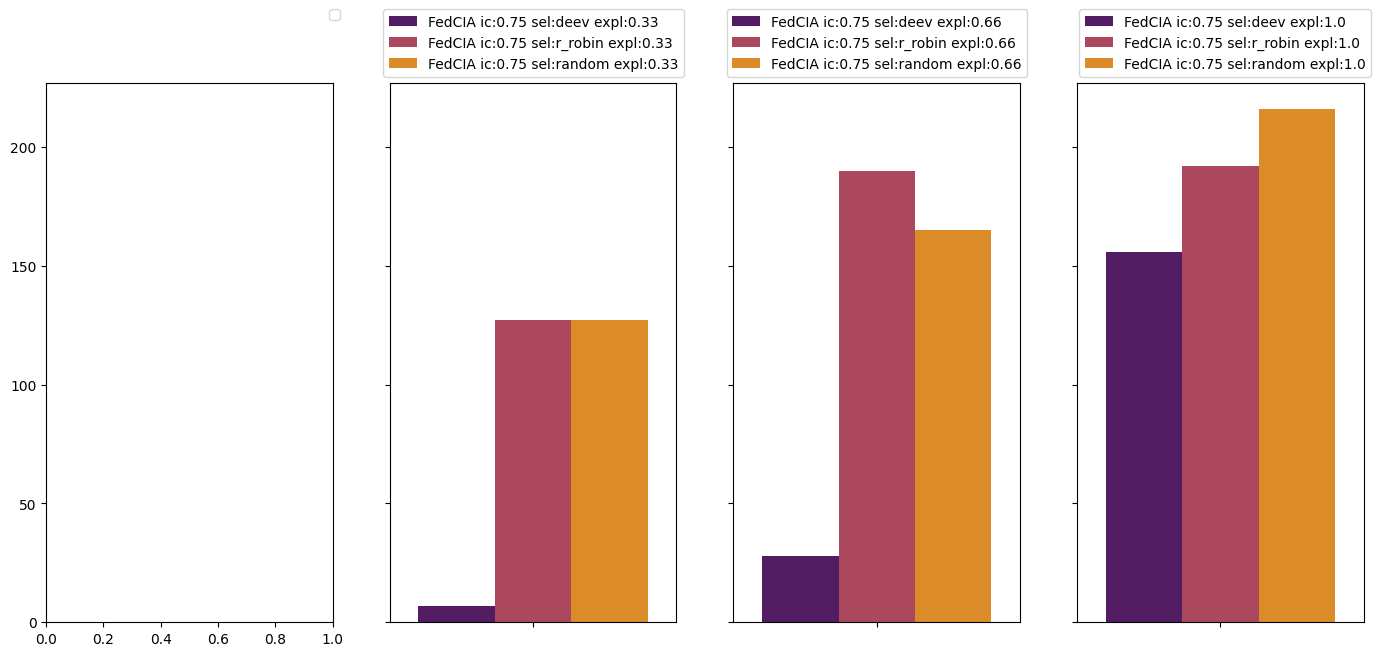

In [ ]:
fig_0_75, ax_0_75 = plt.subplots(1,4, figsize=(17,7), sharey=True)
plot_bw_only_cia([df_0_75_0_0, df_0_75_0_33, df_0_75_0_66, df_0_75_1_00], ax_0_75)
fig_0_75.savefig('0.75.png', format='png', dpi=300)
fig_0_75.subplots_adjust(hspace=0)
fig_0_75.show()